In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('merged.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11461 entries, 0 to 11460
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   odiNumber                    11461 non-null  int64  
 1   crash                        11461 non-null  bool   
 2   fire                         11461 non-null  bool   
 3   numberOfInjuries             11461 non-null  int64  
 4   numberOfDeaths               11461 non-null  int64  
 5   incident_filing_lag          11440 non-null  float64
 6   vin                          10625 non-null  object 
 7   components                   11461 non-null  object 
 8   summary_complaint            11461 non-null  object 
 9   Model                        11461 non-null  object 
 10  ModelYear                    11461 non-null  int64  
 11  NHTSA_ACTION_NUMBER          11461 non-null  object 
 12  component_name               11461 non-null  object 
 13  days_taken_in_in

In [14]:
df.isnull().sum()

odiNumber                         0
crash                             0
fire                              0
numberOfInjuries                  0
numberOfDeaths                    0
incident_filing_lag              21
vin                             836
components                        0
summary_complaint                 0
Model                             0
ModelYear                         0
NHTSA_ACTION_NUMBER               0
component_name                    0
days_taken_in_investigation     220
campaign_number                6531
subject                           0
summary_investigation             0
recall_happened                   0
dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# Handle missing values
df['incident_filing_lag'].fillna(df['incident_filing_lag'].median(), inplace=True)
df['days_taken_in_investigation'].fillna(df['days_taken_in_investigation'].median(), inplace=True)

# Create binary indicator for campaign_number
df['campaign_number_present'] = df['campaign_number'].notnull().astype(int)

C:\Users\Asus\AppData\Local\Temp\ipykernel_23992\3879057925.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['incident_filing_lag'].fillna(df['incident_filing_lag'].median(), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_23992\3879057925.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

Stats for numberOfInjuries:
recall_happened
0    0.012364
1    0.020784
Name: numberOfInjuries, dtype: float64


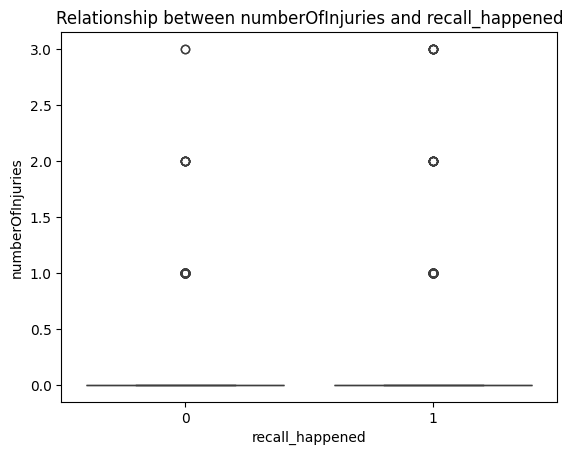

Stats for numberOfDeaths:
recall_happened
0    0.000000
1    0.001286
Name: numberOfDeaths, dtype: float64


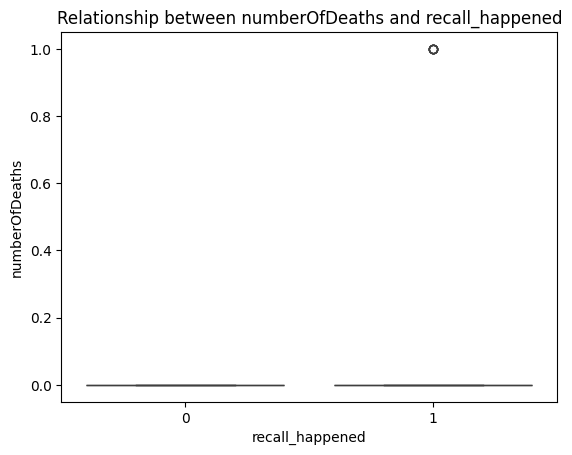

Stats for incident_filing_lag:
recall_happened
0    151.963644
1    213.402400
Name: incident_filing_lag, dtype: float64


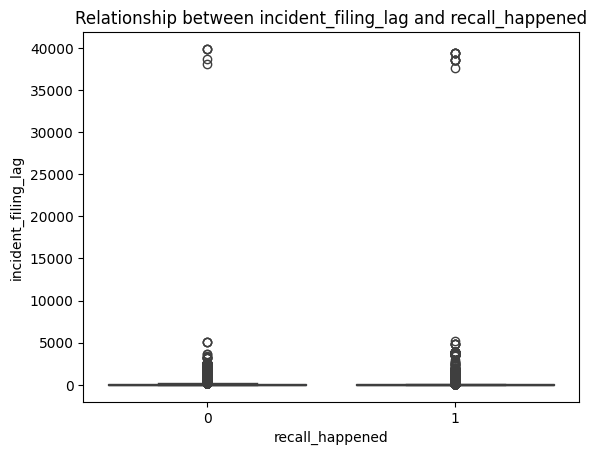

Stats for days_taken_in_investigation:
recall_happened
0    994.196497
1    376.785301
Name: days_taken_in_investigation, dtype: float64


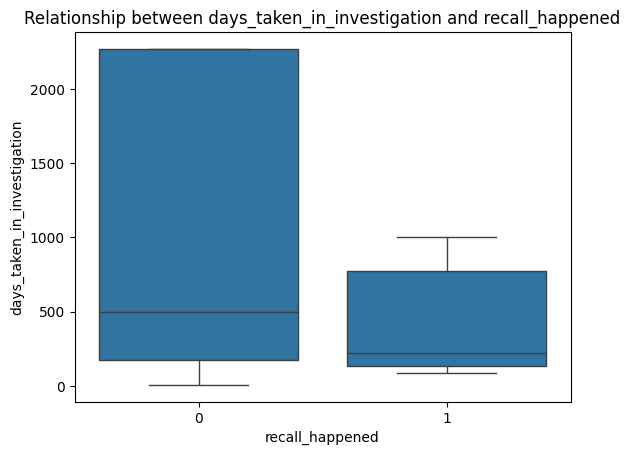

In [17]:
# Analyze numerical columns
numerical_cols = ['numberOfInjuries', 'numberOfDeaths', 'incident_filing_lag', 'days_taken_in_investigation']
for col in numerical_cols:
    print(f"Stats for {col}:")
    print(df.groupby('recall_happened')[col].mean())
    sns.boxplot(x='recall_happened', y=col, data=df)
    plt.title(f'Relationship between {col} and recall_happened')
    plt.show()

Chi-square test for crash: p-value = 0.11547371660885505


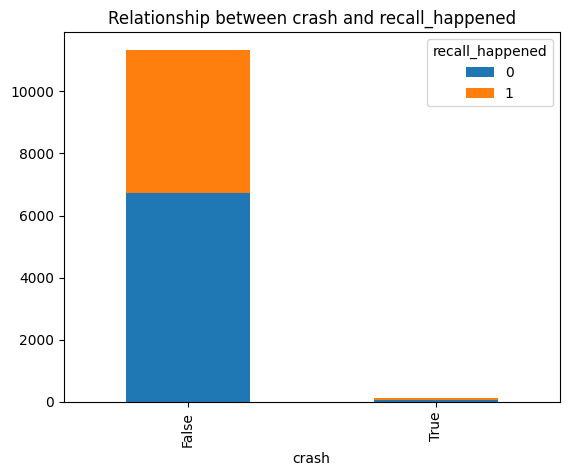

Chi-square test for fire: p-value = 6.171951424839821e-12


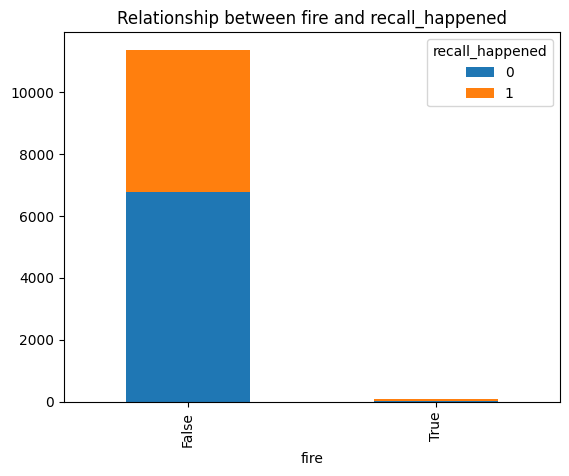

Chi-square test for campaign_number_present: p-value = 0.0


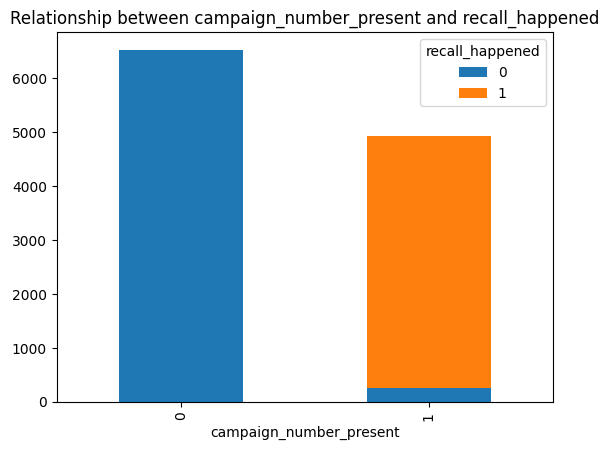

In [18]:
from scipy.stats import ttest_ind, chi2_contingency

# Analyze boolean columns
boolean_cols = ['crash', 'fire', 'campaign_number_present']
for col in boolean_cols:
    crosstab = pd.crosstab(df[col], df['recall_happened'])
    chi2, p, dof, _ = chi2_contingency(crosstab)
    print(f"Chi-square test for {col}: p-value = {p}")
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'Relationship between {col} and recall_happened')
    plt.show()

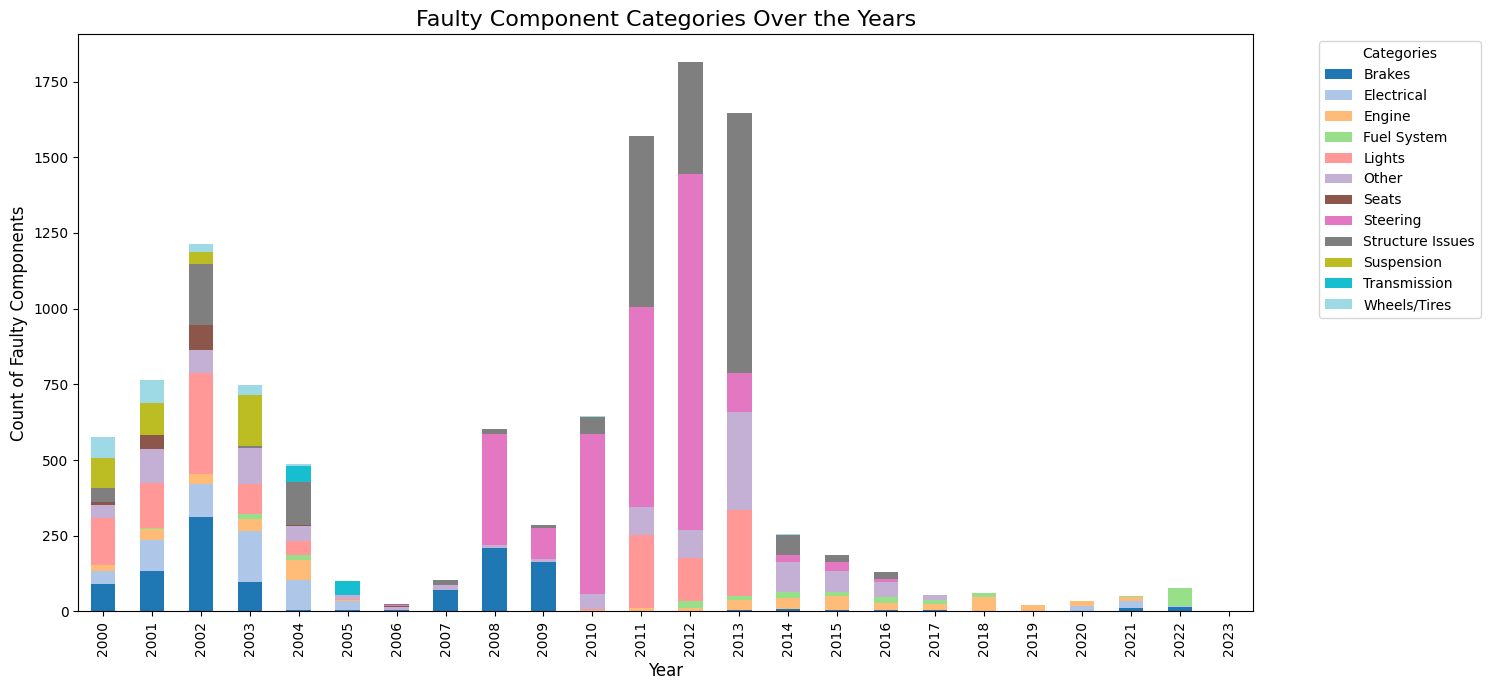

In [19]:
categories = {
    "Airbags": ["airbag", "inflator", "critical fasteners"],
    "Brakes": ["brake", "hydraulic"],
    "Engine": ["engine", "cooling"],
    "Suspension": ["suspension", "control arm"],
    "Steering": ["steering", "column", "power steering"],
    "Lights": ["visibility", "lighting", "headlight", "taillight"],
    "Structure Issues": ["Body","accelerator pedal","Structure","Frame","Strut","Door","Hactchback","liftgate","Hinge","roof","pillar","Doors/Latches", "latch", "locks", "doors"],
    "Transmission": ["transmission", "gear", "clutch", "powertrain", "gear box"],
    "Seats": ["seat", "seating", "seatbelt"],
    "Electrical": ["electrical","cables","camera","sensor", "battery","cruise control", "wiring", "short circuit"],
    "Wheels/Tires": ["tire", "wheel", "rim","axel","assembly","alignment"],
    "Fuel System": ["fuel", "tank", "pump", "fuel line"],
    "Other": []  # To capture components that don't match any category
}

# Step 2: Function to map components to categories
def map_to_category(component):
    component = str(component).lower()  # Convert to lowercase for keyword matching
    for category, keywords in categories.items():
        if any(keyword in component for keyword in keywords):
            return category
    return "Other"  # Assign to "Other" if no match is found

# Step 3: Apply the mapping function
df['Category'] = df['component_name'].apply(map_to_category)

# Step 4: Group by Year and Category
grouped = df.groupby(['ModelYear', 'Category']).size().reset_index(name='Count')

# Pivot for visualization
pivot_data = grouped.pivot(index='ModelYear', columns='Category', values='Count').fillna(0)

# Step 5: Plot the distribution of all categories
pivot_data.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
plt.title('Faulty Component Categories Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Faulty Components', fontsize=12)
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



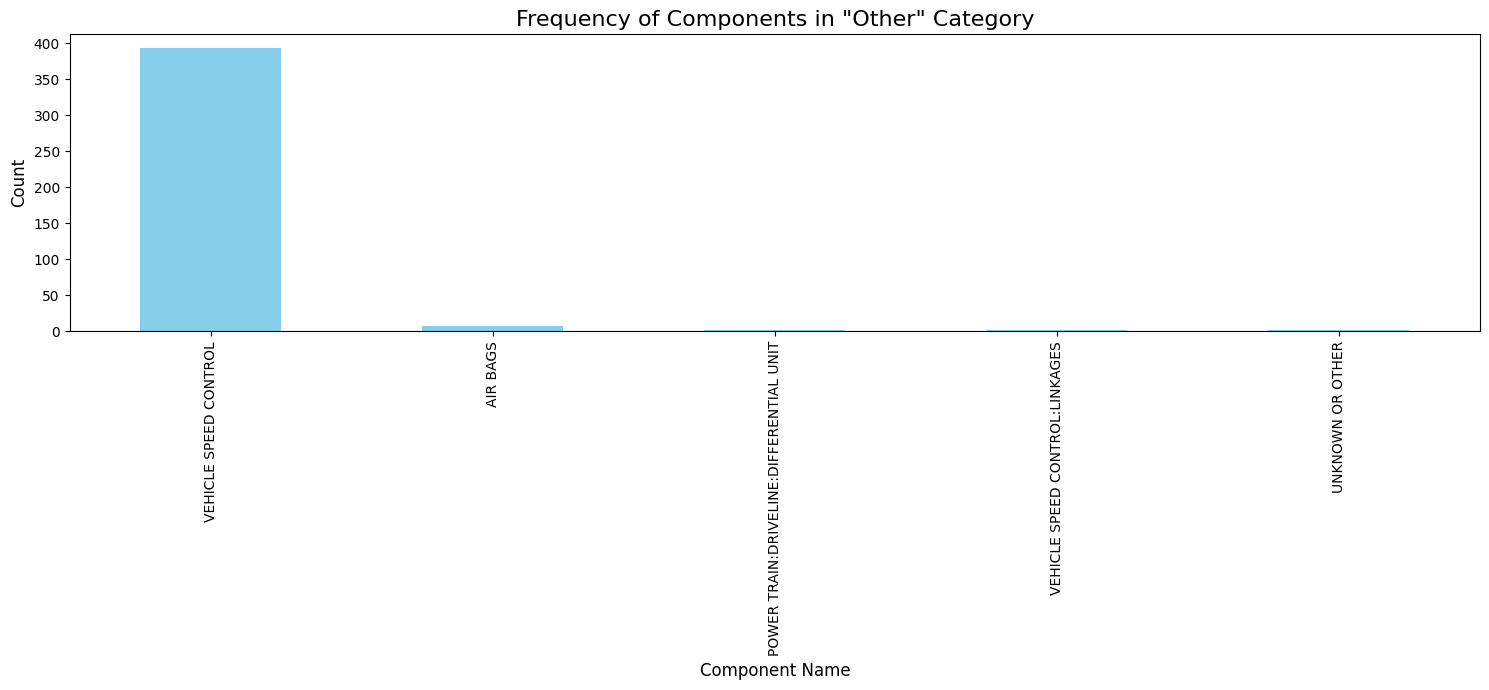

In [20]:
# Step 2: Define categories and keywords
categories = {
    "Airbags": ["airbag", "inflator", "critical fasteners", "restraint"],
    "Brakes": ["brake", "hydraulic", "caliper", "disc", "rotor", "pads"],
    "Engine": ["engine", "cooling", "cylinder", "piston", "timing", "oil", "belt", "gasket"],
    "Suspension": ["suspension", "control arm", "shock absorber", "spring"],
    "Steering": ["steering", "column", "rack", "power steering", "tie rod"],
    "Lights": ["visibility", "lighting", "headlight", "taillight", "indicator", "bulb"],
    "Structure Issues": [
        "body", "accelerator pedal", "structure", "frame", "strut", "door", "hatchback", 
        "liftgate", "hinge", "roof", "pillar", "doors/latches", "latch", "locks", "doors", "panel"
    ],
    "Transmission": ["transmission", "gear", "clutch", "powertrain", "gearbox", "drivetrain", "gear box"],
    "Seats": ["seat", "seating", "seatbelt", "restraint", "headrest"],
    "Electrical": [
        "electrical", "battery", "wiring", "short circuit", "alternator", "starter", "cables", 
        "camera", "sensor", "cruise control"
    ],
    "Wheels/Tires": ["tire", "wheel", "rim", "hub", "axle", "assembly", "alignment"],
    "Fuel System": ["fuel", "tank", "pump", "fuel line", "injector"],
    "Other": []  # To capture components that don't match any category
}


# Step 3: Function to map components to categories
def map_to_category(component):
    component = str(component).lower()  # Convert to lowercase for keyword matching
    for category, keywords in categories.items():
        if any(keyword in component for keyword in keywords):
            return category
    return "Other"  # Assign to "Other" if no match is found

# Step 4: Apply the mapping function
df['Category'] = df['component_name'].apply(map_to_category)

# Step 5: Filter for "Other" category and count the occurrences of each component name
other_components = df[df['Category'] == 'Other']['component_name'].value_counts()

# Step 6: Visuliazing how many components fall under "Other" category
plt.figure(figsize=(15, 7))
other_components.plot(kind='bar', color='skyblue')
plt.title('Frequency of Components in "Other" Category', fontsize=16)
plt.xlabel('Component Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

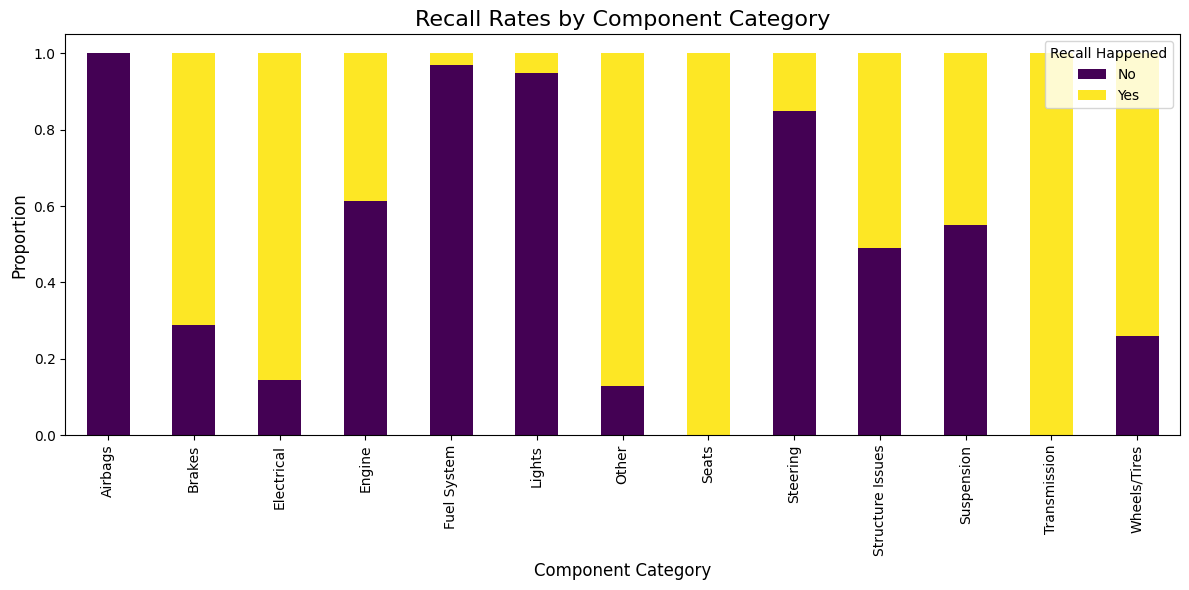

In [21]:
def map_component_name(value):
    value = str(value).lower()  # Convert to lowercase for matching
    for category, keywords in categories.items():
        if any(keyword in value for keyword in keywords):
            return category
    return "Other"  # Assign "Other" if no match is found

# Combine component_name, components, and subject into a single column
df['Combined_Components'] = df[['component_name', 'components', 'subject']].fillna('').agg(' '.join, axis=1)

# Map the combined values to categories using the refined dictionary
df['Mapped_Component'] = df['Combined_Components'].apply(map_component_name)
# Group by Mapped_Component and calculate recall rates
recall_analysis = df.groupby('Mapped_Component')['recall_happened'].value_counts(normalize=True).unstack().fillna(0)

# Plot the recall rates
recall_analysis.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Recall Rates by Component Category', fontsize=16)
plt.xlabel('Component Category', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Recall Happened', labels=['No', 'Yes'], loc='upper right')
plt.tight_layout()
plt.show()


Topic 1:
control engine rack speed vehicle pinion brakes service throttle stuck
Topic 2:
steering power failure door light latch warning ajar linkages latches


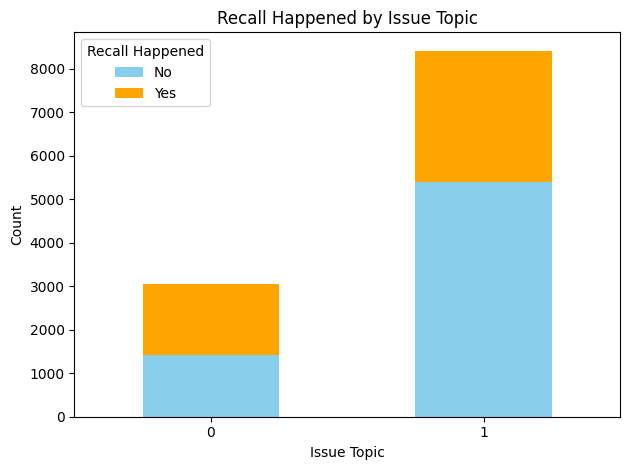

In [27]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Combine text data
df['issue_text'] = df['component_name'] + " " + df['subject']

# Vectorize text
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['issue_text'])

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Display top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, 10)

# Assign topics to rows
df['Issue_Topic'] = lda.transform(X).argmax(axis=1)

# Analyze recall by topic
topic_analysis = df.groupby(['Issue_Topic', 'recall_happened']).size().unstack(fill_value=0)
topic_analysis.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Recall Happened by Issue Topic')
plt.xlabel('Issue Topic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Recall Happened', labels=['No', 'Yes'], fontsize=10)
plt.tight_layout()
plt.show()


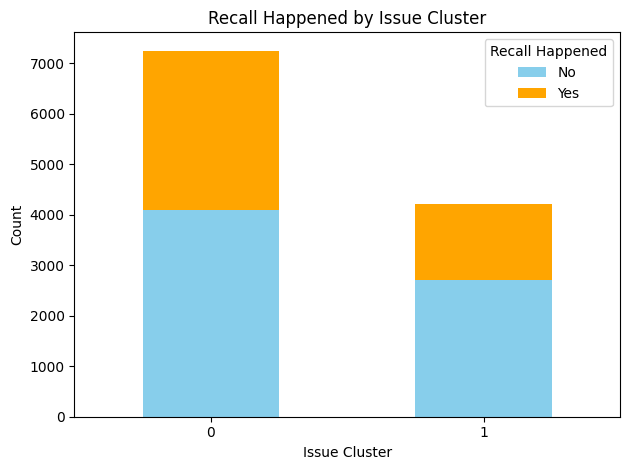

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize the issue text
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['issue_text'])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Issue_Cluster'] = kmeans.fit_predict(X)

# Analyze clusters
cluster_analysis = df.groupby(['Issue_Cluster', 'recall_happened']).size().unstack(fill_value=0)
cluster_analysis.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Recall Happened by Issue Cluster')
plt.xlabel('Issue Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Recall Happened', labels=['No', 'Yes'], fontsize=10)
plt.tight_layout()
plt.show()


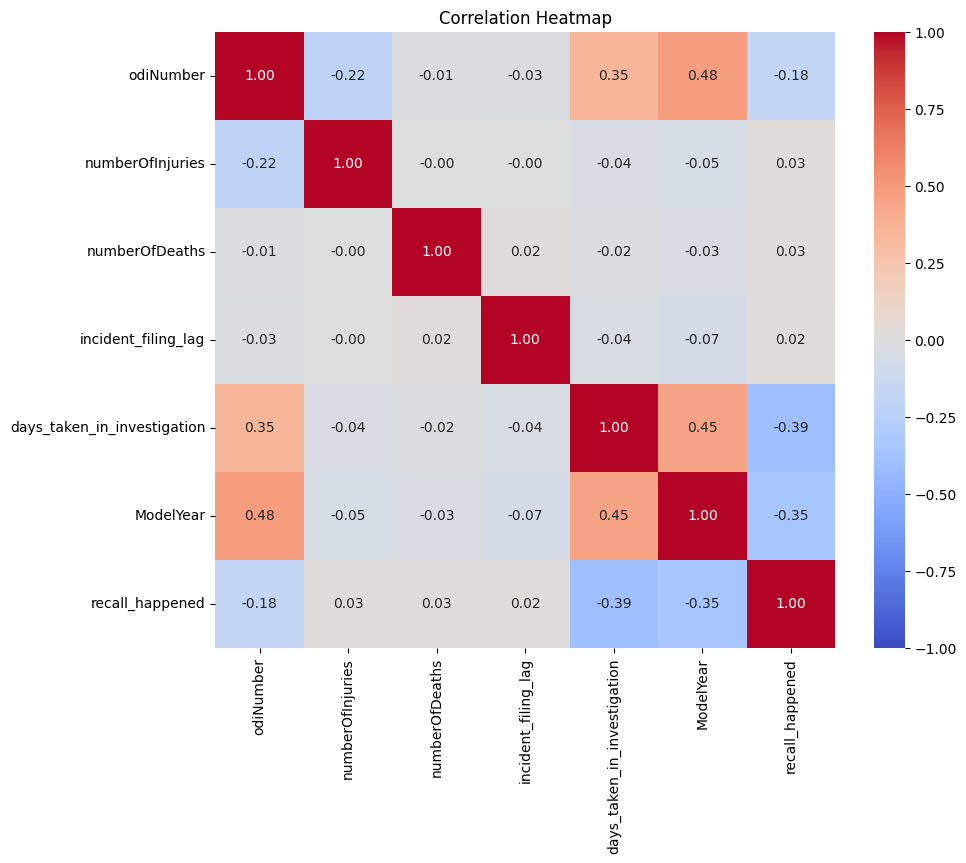

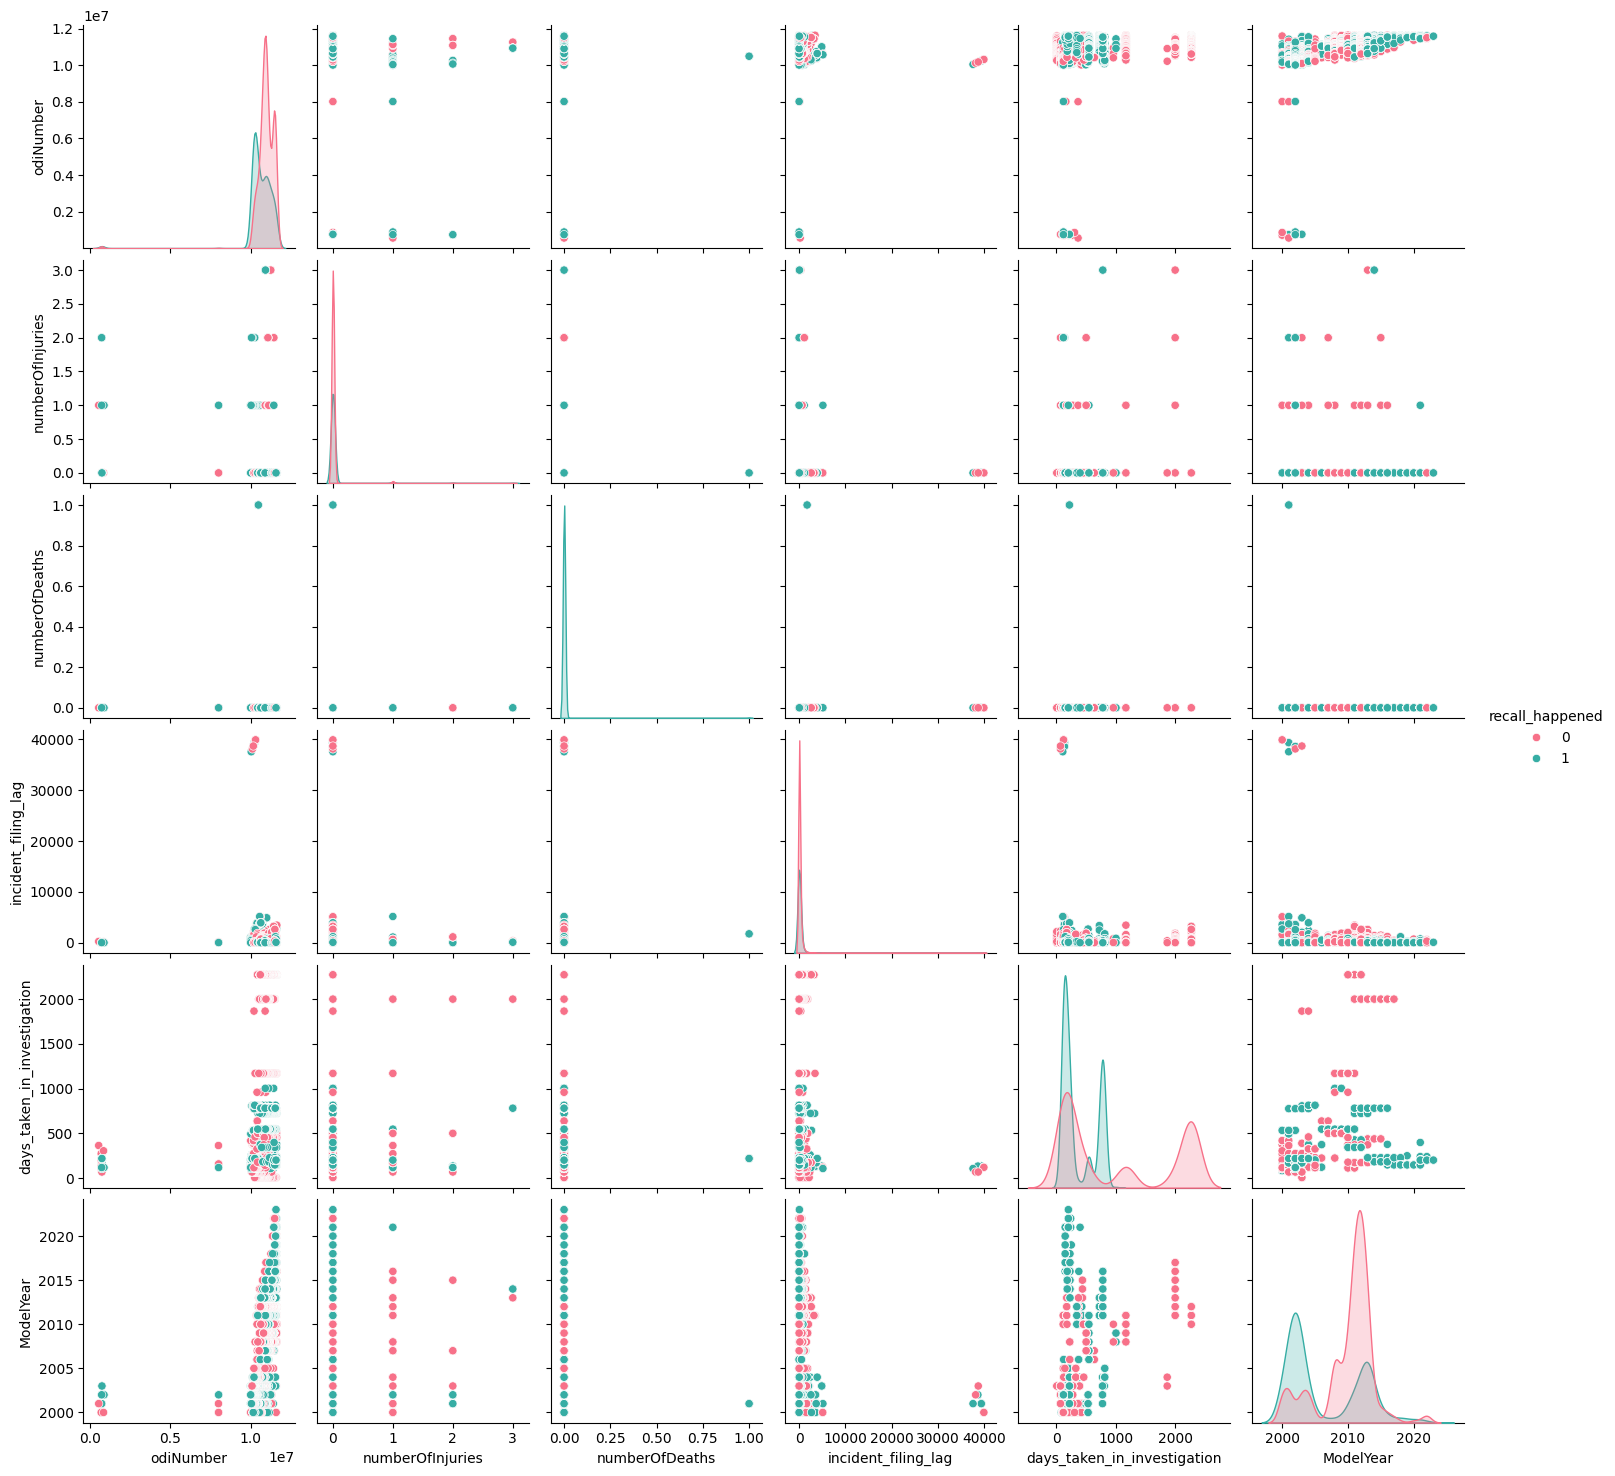

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Filter for numerical columns
numerical_cols = ['odiNumber', 'numberOfInjuries', 'numberOfDeaths', 'incident_filing_lag',
                  'days_taken_in_investigation', 'ModelYear', 'recall_happened']
df_numerical = df[numerical_cols]

# Calculate correlation matrix
correlation_matrix = df_numerical.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

# Generate pairplot
sns.pairplot(df_numerical, hue="recall_happened", diag_kind="kde", palette="husl")
plt.show()


In [ ]:
from transformers import pipeline

# Load Zero-Shot Classification Pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define classes
labels = ["Manufacturer-Originated", "External Factor"]

# Combine component_name and subject columns
df['issue_text'] = df['component_name'] + " " + df['subject']

# Classify issues
df['Classification'] = df['issue_text'].apply(lambda x: classifier(x, labels)['labels'][0])

# Analyze results
print(df['Classification'].value_counts())


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Asus\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingfac